In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
df = pd.read_csv("houses.csv")

In [152]:
# separate to feature and label

x = df[['no. of bedrooms'
    ,'area'
    ,'indoorgames'
    , 'resale'
    , 'maintenancestaff'
    , 'gymnasium'
    , '24x7security'
    , 'atm'
    , 'wifi']]
y = df['price']

# 2518 objects


In [153]:
# 80\20 separation to train and test groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 2014 for train set
# 504  for test set

In [154]:
model = linear_model.LinearRegression()

In [155]:
model.fit(x_train, y_train)

LinearRegression()

In [156]:
y_pred = model.predict(x_test)

In [157]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [158]:
print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)
print("Mean squared error: \n", mean_squared_error(y_test, y_pred))
print("RMSE: \n", rmse)
print("R^2: \n", r2_score(y_test, y_pred))

Coefficients: 
 [-1678299.96507693    10697.99760403  1089978.03595158  1523134.33832925
 -1512478.24398036   424799.25290939  -428806.71871115   441713.35771925
  -145594.25961146]
Intercept: 
 -3879663.051744748
Mean squared error: 
 11935491107571.709
RMSE: 
 3454778.011330353
R^2: 
 0.8066911979820655


In [159]:
print(y_test.shape)
print(y_pred.shape)

(504,)
(504,)


<Axes: xlabel='price'>

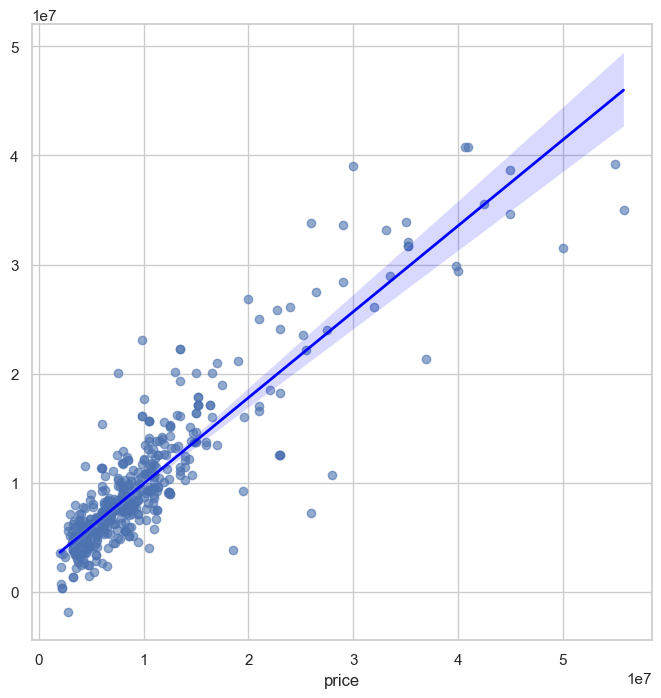

In [160]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 8))

sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'blue', 'linewidth':2})


In [161]:
lims = [
    np.min([y_test.min(), y_pred.min()]),
    np.max([y_test.max(), y_pred.max()]),
]

In [162]:
average_prediction = np.mean(y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [163]:
plt.figtext(0.5, -0.1,
            f'Average Predicted Price: {int(average_prediction)} | RMSE: {int(rmse)}',
            ha='center', fontsize=12)

Text(0.5, -0.1, 'Average Predicted Price: 9573125 | RMSE: 3454778')

<Figure size 640x480 with 0 Axes>